https://drive.google.com/file/d/169nZajFn-rtvf5rdjV-wDg4FcnAj1nef/view

# Default Template
```
from pymongo import MongoClient
client = MongoClient("localhost", 27017)
mycoll = client["databasename"]["collectionname"]
```
---

##  Insertion

In order to insert into the database, either `insert_one()` or `insert_many()` can be used
```
    myList = [
        {"name": "Amy", "address":"Apple ST 652"},
        {"name": "Hannah", "address":"Montain 21"},
        {"name": "Michael", "address":"Valley 345"},
        {"name": "Sandy", "address":"Ocean blvd 2"},
        {"name": "Betty", "address":"Green Grass 1"},
        {"name": "Richard", "address":"Sky st 331"}
    ]
    
    #Inserts one document into the collection
    mycoll.insert_one({"name": "Amy", "address": "Apple ST 652"})
    
    #Inserts list of documents into the collection
    mycoll.insert_many(myList)
```
____

## Find

```
myresult = mycoll.find(myquery, myprojection) 
myresults = mycoll.find_one(myquery, myprojection)
# Returns number of documents
print(myresults.count())
```


**Note that both myquery and myprojection are optional**


- `.limit()`: Limits results to the first n documents which match the query
        myresults = mycoll.find(myquery, myprojection).limit(n)

- `.sort()`: Sorts results based on field specified, either 1(ascending) or -1(descending)
        myresults = mycoll.find(myquery, myprojection).sort("age", 1)
        
- `.skip()`: Skips the number of results specified



#### Query
Queries are usually represented by `myquery` and are enclosed in { }. They describe the conditions placed on the results of the search.

- `'$and'`: Join two or more comparison queries together
         ## Looks for the documents with title containing the word                    Programming, pageCount is not zero and has author information.

         myquery = {"$and": [{"title": {"$regex": "Programming"}}, \
         {'pageCount':{"$gt":0}}, {'authors':{"$exists":True}}]}
             
- `'$regex'`: Find whether a result contains a specified value
        #Find documents with title containing "Hadoop" 
        myquery = {"title":{"$regex":"Hadoop"}}
        
- `'$or'`: Finds documents which fulfill either or both conditions
        myquery = {"$or":[{"class":"18S01"}, {"class":"19S01"}]}

- `'$exists'`: Looks for documents which possess the specified field
        myquery = {"qty":{"$exists":False}}

#### Projection
Projections are usually represented by `myprojection` and are enclosed in { }.
They describe which documents are shown.

Example: 

```
  # Only title and author of the documents are included in the results
   myprojection = {"title": 1, "author": 1, "_id": 0}

   myprojection1 = {"authors": 0, "categories": 0} 
```

- _id is a special header which can only be excluded using "_id": 0

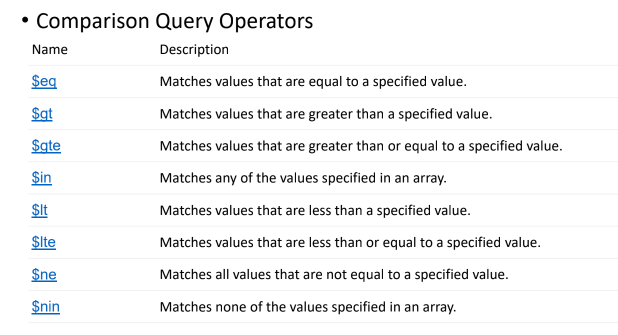

Example:
```
myquery = {"amt": {"$gt":"2"}}
```

## Update
In order to update the database, either `update_one()` or `update_many()` can be used

```
    myquery = {"address": "Valley 345"}
    newval = {"$set": {"address": "Canyon 123", "country": "China"}}

    #Updates the first document that satisfies the query 
    mycoll.update_one(myquery, newval)
    
    #Updates all documents which satisfy the query
    mycoll.update_many(myquery, newval)
    
    x = mycoll.update_many(myquery, newval)
    print(x.modified_count)
```

## Deletion

In order to delete documents, either `delete_one()` or `delete_many()` can be used.

``` 
myquery = {"address": "Canyon 123"}

#Deletes the first document that satisfies the query
mycoll.delete_one(myquery)

#Deletes all the documents which satisfy the query
mycoll.delete_many(myquery)

#Deletes all the documents in the collection
mycoll.delete_many({})

#Returns the number of deleted documents
result = mycoll.delete_many(myquery)
print(result.deleted_count)
```

## Other useful methods

* count() - to count the number of documents in a collection.
    ```
        mycoll = mydb["cars"]
        print(mycoll.count())
        
    ```
* Using cursor 
    ```
    cursor = mycoll.find()
    for x in cursor:
        print(x)
    ```

# Importing data from files

### CSV

```
    import csv
    
    with open("language.csv", 'r') as file:
        # Assumes first line contains keys of dict
        # Assumes delimiter is commas
        # skipinitialspace deletes the trailing white space after 
        #the delimiter
        reader = csv.DictReader(file, skipinitialspace=True)     
                                                                     
        for row in reader:
            mycoll.insert_one(row)

    result = mycoll.find()
    print("Number of documents added: ", result.count())
    client.close()
```
---
```
    #If field names are not given within the text file
    with open("language.csv", 'r') as file:
        reader = csv.reader(file, delimiter=',')

        for row in reader:
            mycoll.insert_one(row)
```

### Json

```
    import json

    with open('intern.json') as file:
        data = json.load(file)
        for person in data['intern_details']:
            mycoll.insert_one(person)
    file.close()

    result = mycoll.find()
    for r in result:
        print(r)
        
    print("Number of documents added: ", result.count())
    
```